**Plot a continous variable ('MPG Higway') 4 ways**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df1 = pd.read_csv('cars.csv')
df1['Min Price']=df1['Min Price']*100
df1['Mid Price']=df1['Mid Price']*100
df1['Max Price']=df1['Max Price']*100

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


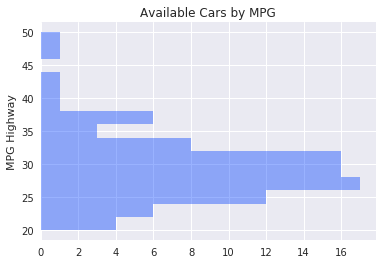

In [4]:
sns.set(style="darkgrid", palette='bright')
g = sns.distplot(df1['MPG Highway'], bins=15, kde=False, vertical=True)
sns.despine()
plt.title("Available Cars by MPG")
plt.show()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


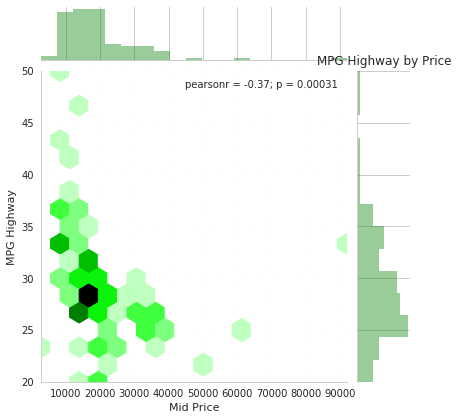

In [5]:
sns.set(style='whitegrid')

g = sns.jointplot(x=df1['Mid Price'], y=df1['MPG Highway'], kind="hex", color='g')

plt.title("MPG Highway by Price")
plt.show()

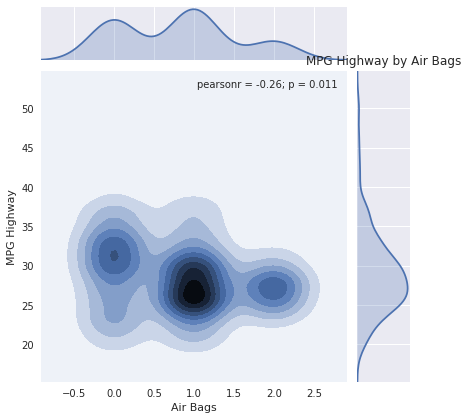

In [6]:
sns.set(style='darkgrid')

g = sns.jointplot(x=df1["Air Bags"], y=df1['MPG Highway'], data=df1, kind="kde")

plt.title('MPG Highway by Air Bags')

plt.show()

<Figure size 1080x720 with 0 Axes>

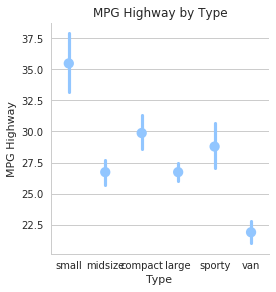

In [47]:
sns.set(style='whitegrid', palette='pastel')
plt.figure(figsize=(15,10))
g = sns.factorplot(x="Type",
                   y='MPG Highway',
                   data=df1, kind='point', 
                   join=False)
plt.title("MPG Highway by Type")
plt.show()

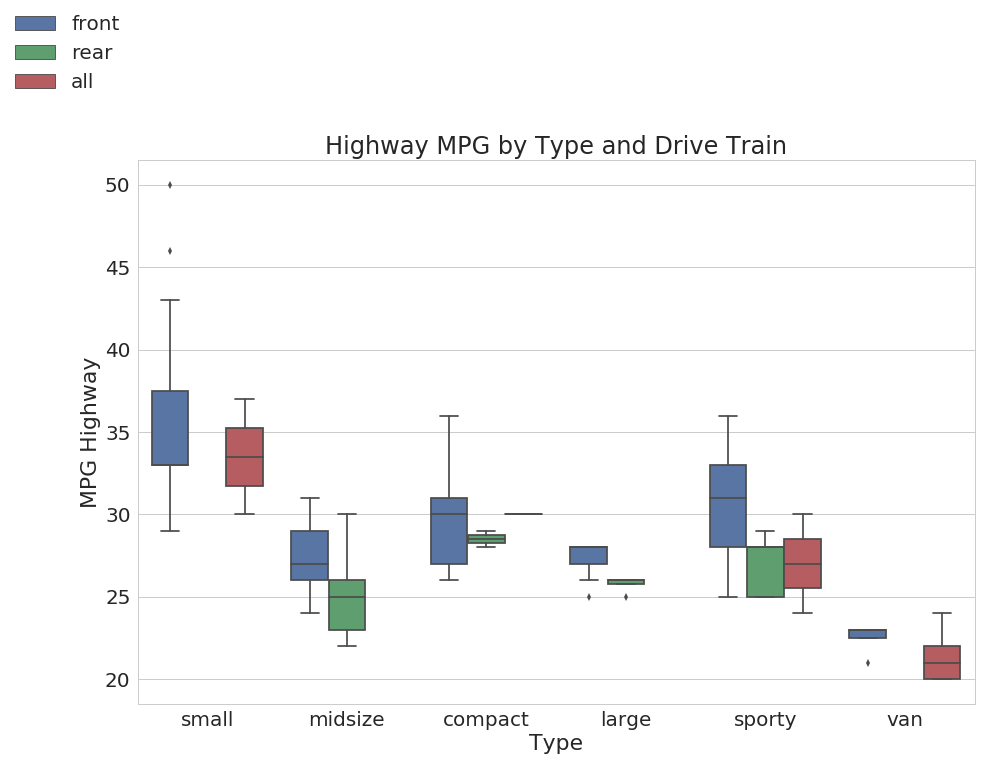

In [8]:
sns.set(style='whitegrid', font_scale=2)
plt.figure(figsize=(15,10))
g = sns.boxplot(x=df1["Type"], y=df1['MPG Highway'], hue=df1["Drive Train"], data=df1.groupby('Type').mean())
plt.title('Highway MPG by Type and Drive Train')
g.legend(bbox_to_anchor=(0,1.3))
plt.show()

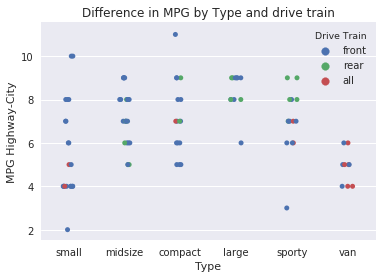

In [48]:
sns.set(style='darkgrid')

bar = df1['MPG Highway']-df1['MPG City']
df1['dif'] = bar
g = sns.stripplot(y='dif',
               x='Type',
               hue='Drive Train',
               data=df1,
               jitter=True)
g.set_ylabel('MPG Highway-City')
plt.title('Difference in MPG by Type and drive train')
plt.show()

**Plot 2 continuous variables three different ways.**

In [10]:
df2 = pd.read_csv('combine.csv')
df2.dropna(inplace=True)
list(df2)

['Year',
 'Name',
 'College',
 'POS',
 'Height (in)',
 'Weight (lbs)',
 'Hand Size (in)',
 'Arm Length (in)',
 '40 Yard',
 'Bench Press',
 'Vert Leap (in)']

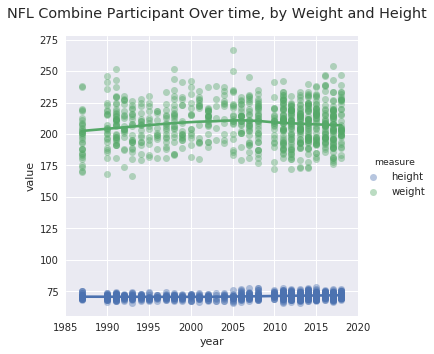

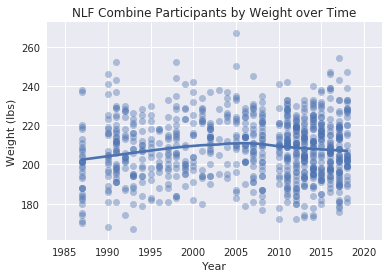

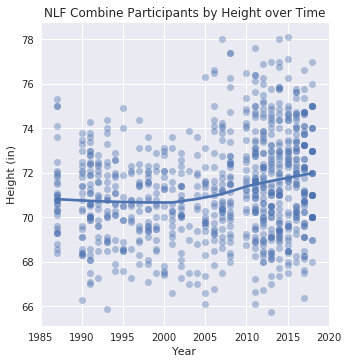

In [74]:
#1
mw = pd.DataFrame()
mw.set_index=('measure')
mw['value'] = df2['Height (in)']
mw['year'] =df2['Year']
mw['measure'] = "height"
mw['position'] = df2["POS"]
mw['train'] = df2['40 Yard']
mw['tvalue'] ='40yard'
mh = pd.DataFrame()
mh['value'] = df2['Weight (lbs)']
mh['measure'] = 'weight'
mh['year'] = df2['Year']
mh['position'] = df2["POS"]
mh['train'] = df2['Bench Press']
mh['tvalue'] = 'benchpress'

measure = pd.concat([mw, mh], sort=True)

sns.set(style='darkgrid')

g = sns.lmplot(x='year',
               y='value',
               hue='measure', 
               data=measure,
               lowess=True,
               scatter_kws={'alpha':.4})
plt.suptitle("NFL Combine Participant Over time, by Weight and Height")
plt.subplots_adjust(top=.9)
plt.show()

f = sns.regplot(x='Year',
               y='Weight (lbs)',
               data=df2,
               lowess=True,
               scatter_kws={'alpha':.4})
plt.title("NLF Combine Participants by Weight over Time")
plt.show()

h = sns.lmplot(x='Year',
               y='Height (in)',
               data=df2,
               lowess=True,
               scatter_kws={'alpha':.4})
plt.title("NLF Combine Participants by Height over Time")
plt.show()

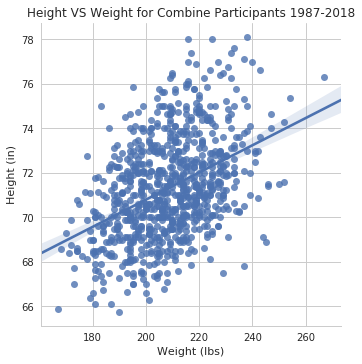

In [52]:
#3
sns.set(style='whitegrid')

g = sns.lmplot(x='Weight (lbs)', y='Height (in)', data=df2)

plt.title("Height VS Weight for Combine Participants 1987-2018")
plt.show()


**Chose a continuous variable and a categorical variable plot 6 ways**

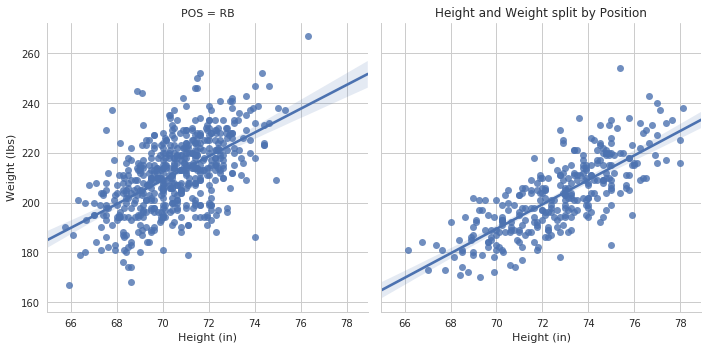

In [72]:
sns.set(style='whitegrid')

g = sns.lmplot(x="Height (in)",
               y="Weight (lbs)",
               data=df2, 
               col='POS')
plt.title("Height and Weight split by Position")
plt.show()


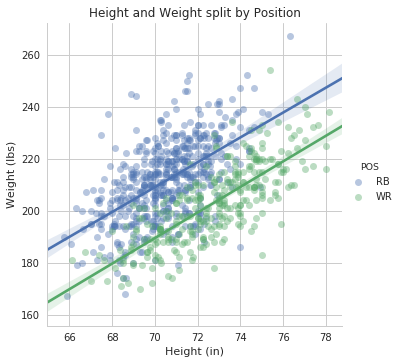

In [90]:
sns.set(style='whitegrid')

g = sns.lmplot(x="Height (in)",
               y="Weight (lbs)",
               hue='POS',
               data=df2,
               scatter_kws={'alpha':0.4})
plt.title("Height and Weight split by Position")
plt.show()

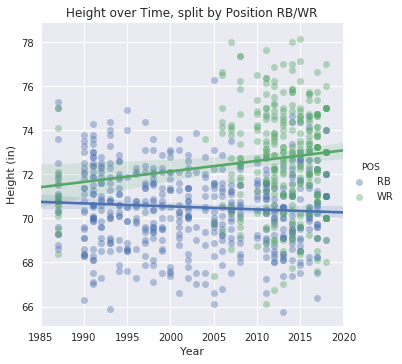

In [63]:
sns.set(style='darkgrid')
g = sns.lmplot(x='Year',
               y="Height (in)",
               hue='POS',
               data=df2,
               scatter_kws={'alpha':0.4}) 
plt.title('Height over Time, split by Position RB/WR')
plt.show()

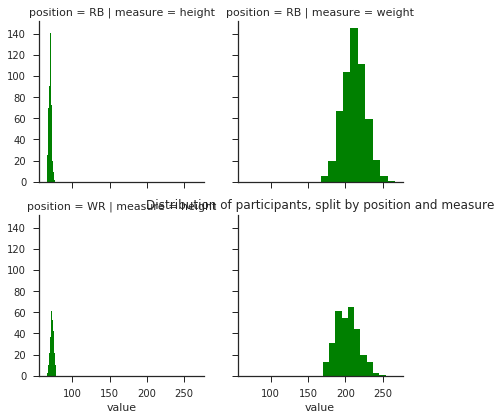

In [70]:

sns.set(style='ticks')

g = sns.FacetGrid(measure, row='position', col='measure')
g.map(plt.hist, 'value', color='green',lw=0)
plt.title("Distribution of participants, split by position and measure")
plt.show()

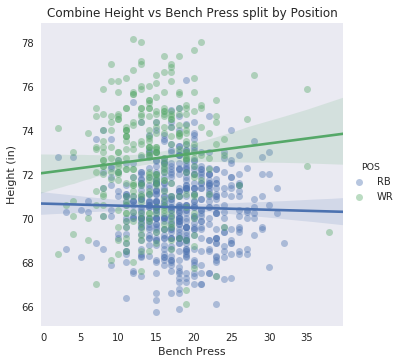

In [87]:
sns.set(style='dark')

g= sns.lmplot(y='Height (in)',
              x='Bench Press',
              hue='POS',
              data=df2,
              scatter_kws={'alpha':.4})
plt.title("Combine Height vs Bench Press split by Position")
plt.show()
              

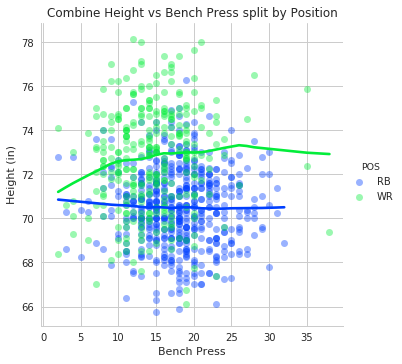

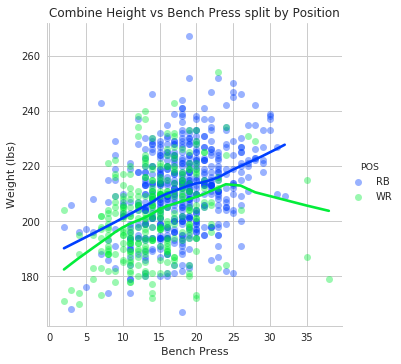

In [97]:
sns.set(style='whitegrid', palette='bright')

g= sns.lmplot(y='Height (in)',
              x='Bench Press',
              hue='POS',
              data=df2,
              scatter_kws={'alpha':.4},
             lowess=True)
plt.title("Combine Height vs Bench Press split by Position")
plt.show()
sns.set(style='whitegrid', palette='bright')

g= sns.lmplot(y='Weight (lbs)',
              x='Bench Press',
              hue='POS',
              data=df2,
              scatter_kws={'alpha':.4},
             lowess=True)
plt.title("Combine Height vs Bench Press split by Position")
plt.show()

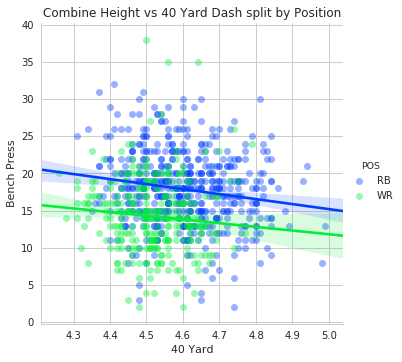

In [98]:
sns.set(style='whitegrid', palette='bright')

g= sns.lmplot(y='Bench Press',
              x='40 Yard',
              hue='POS',
              data=df2,
              scatter_kws={'alpha':.4},
              robust=True)
plt.title("Combine Height vs 40 Yard Dash split by Position")
plt.show()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


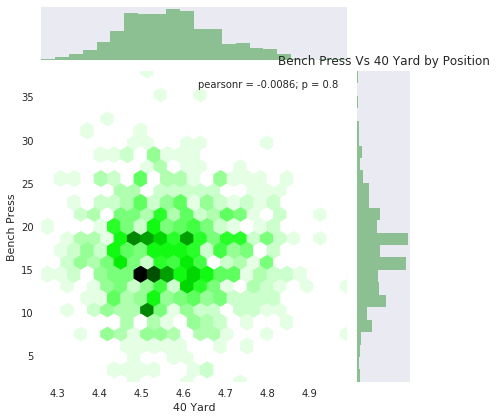

In [102]:
sns.axes_style("white")
g =  sns.jointplot(x='40 Yard',
                   y="Bench Press",
                   kind="hex",
                   data=df2,
                   color="g")
plt.title("Bench Press Vs 40 Yard by Position")
plt.show()

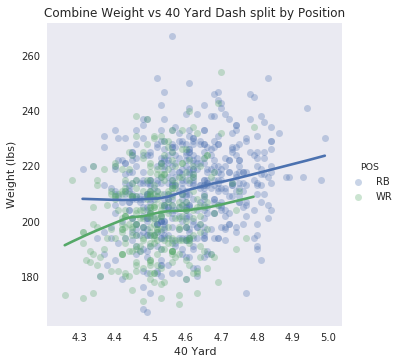

In [104]:
sns.set(style='dark')

g= sns.lmplot(y='Weight (lbs)',
              x='40 Yard',
              hue='POS',
              data=df2,
              scatter_kws={'alpha':.3},
              lowess=True)
plt.title("Combine Weight vs 40 Yard Dash split by Position")
plt.show()